In [40]:
from astropy.io.fits import getdata, getheader
import astropy.units as u
from nustar_lunar_pointing.tracking import get_epoch_tle
from nustar_lunar_pointing.tracking import convert_nustar_time
from nustar_lunar_pointing.tracking import get_moon_j2000

import matplotlib.pyplot as plt
%matplotlib notebook

In [9]:
from datetime import datetime


tlefile = '../data/NuSTAR.tle'
#att = getdata('../data/nu30102028006A.attorb')
#hdr = getheader('../data/nu30102028006A.attorb', 1)
#mjdref = hdr['MJDREFI']

#checktime = convert_nustar_time(att[0]['TIME'])


mindt, line1, line2 = get_epoch_tle(checktime, tlefile)
print(mindt)

15


In [18]:
from astropy.coordinates import SkyCoord
from datetime import timedelta
doff = []
dra = []
ddec =[]
dt = []

base_ra = None
base_dec = None

step_size = timedelta(0, 20.) # 20 second steps
end_check = datetime.strptime('2017-05-10', "%Y-%m-%d")

dt = end_check - checktime
dt.

In [45]:
from astropy.coordinates import SkyCoord
from datetime import timedelta
ra = []
dec =[]
times= []
base_ra = None
base_dec = None

step_size = timedelta(0, 100.) # 1000 second steps
checktime = datetime.strptime('2017-05-08', "%Y-%m-%d")
end_check = datetime.strptime('2017-05-10', "%Y-%m-%d")


while ( (end_check - checktime).total_seconds() ) > 0:
    checktime += step_size
        
    ra_moon, dec_moon, moon_coord = get_moon_j2000(checktime, line1, line2)

    times.extend([checktime])
    ra.extend([ra_moon.value])
    dec.extend([dec_moon.value])
    
#     if base_ra is None:
#         base_ra = ra_moon
#         base_dec = dec_moon
#         base_skycoord = moon_skycoord
#         base_time = min(att['Time'])
#     else:
#         this_skycoord = SkyCoord(ra_moon, dec_moon)
#         doff.extend([this_skycoord.separation(base_skycoord).arcsec])
#         dra.extend([
#             (ra_moon - base_ra).to(u.arcsec).value
#         ])
#         ddec.extend([
#             (dec_moon - base_dec).to(u.arcsec).value
#         ])
#         dt.extend([t0 - base_time])
        


<IPython.core.display.Javascript object>


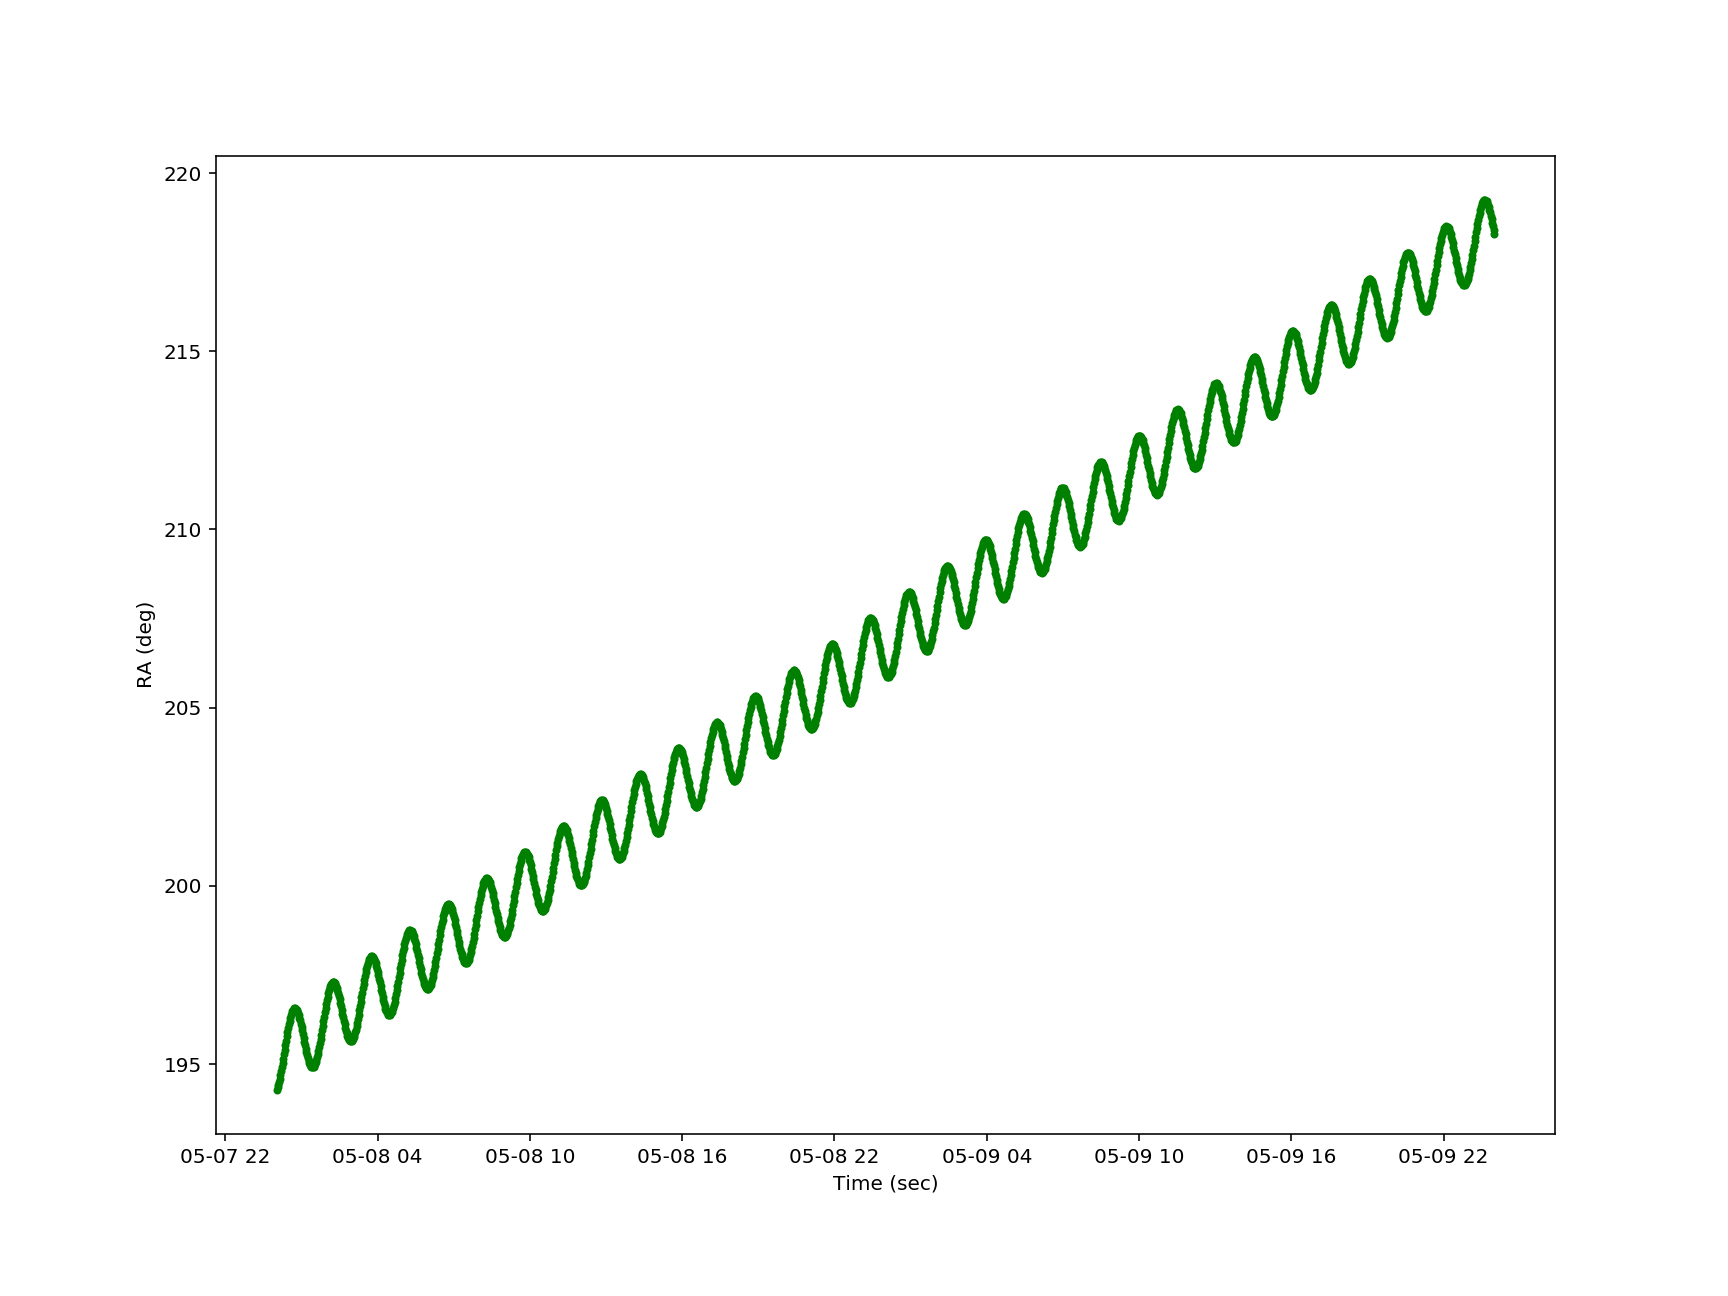

<IPython.core.display.Javascript object>


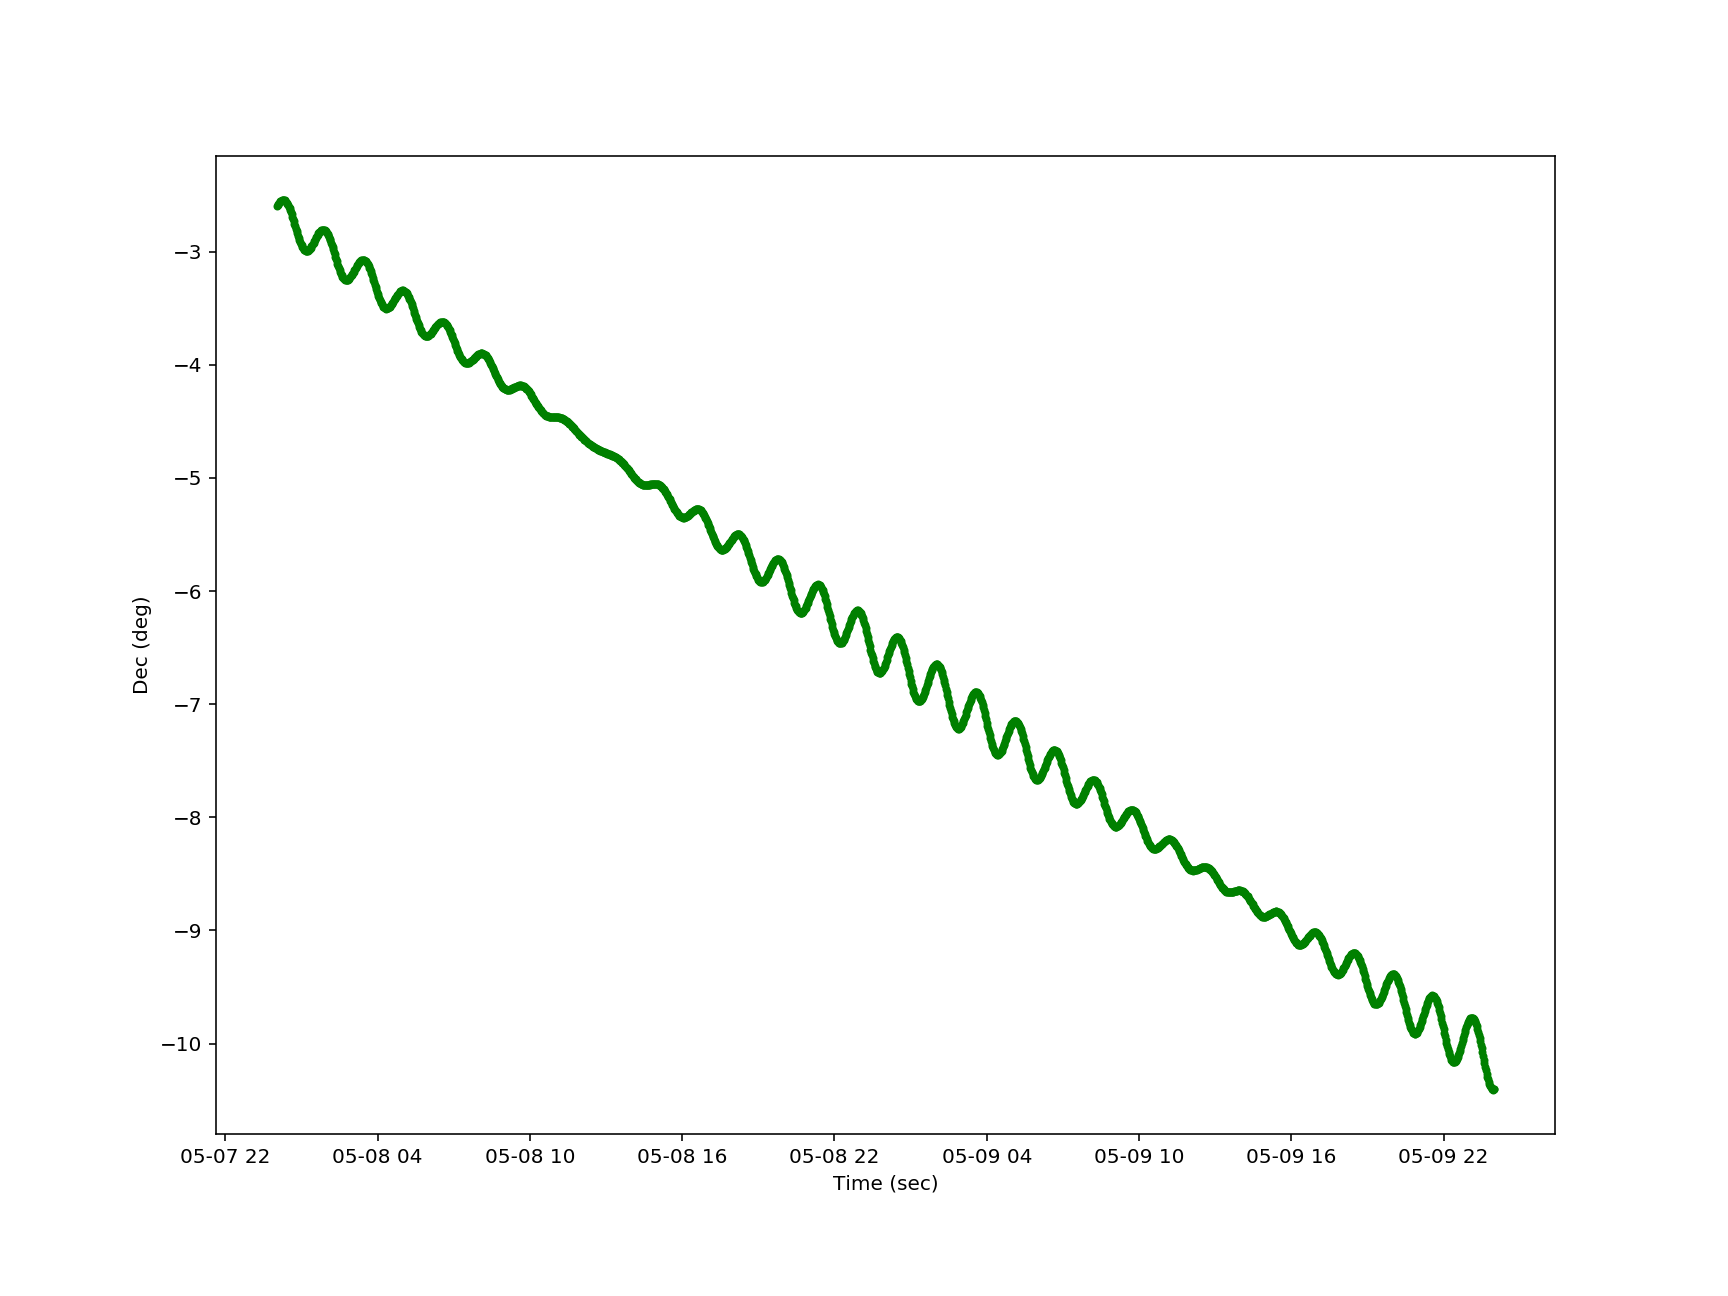

In [47]:
ax = plt.figure(112, figsize=(12, 9))
plt.plot(times, ra, 'g.')
plt.xlabel('Time (sec)')
plt.ylabel('RA (deg)')

ax = plt.figure(212, figsize=(12, 9))


plt.plot(times, dec, 'g.')
plt.xlabel('Time (sec)')
plt.ylabel('Dec (deg)')



In [ ]:
from astropy.coordinates import SkyCoord
doff = []
dra = []
ddec =[]
dt = []

base_ra = None
base_dec = None

tcheck = min(att['Time'])
step_size = 1. # arcminute
last_skycoord = None
last_time = None

set = 0
for ind, t0 in enumerate(att['Time']):

    if (t0 - min(att['Time'])) < 1500:
        continue


    if (t0 - min(att['Time'])) > 1800:
        break

        
    t1 = convert_nustar_time(t0)
    
    ra_moon, dec_moon = get_moon_j2000(t1, line1, line2)
    moon_skycoord = SkyCoord(ra_moon, dec_moon)

    if set == 0:
        print(t1)
        
        if last_time is not None:
            print(t0 - last_time)
        
        last_time = t0
        last_skycoord = moon_skycoord


        set = 1
    else:
        if moon_skycoord.separation(last_skycoord).arcmin > step_size:
            set=0
               
    
    

In [ ]:
dra